<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/3.%20CI%20-%20SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class Imbalance 1**

**Synthetic Minority Over-sampling Technique**

*SMOTE is a popular algorithm used to address the issue of data imbalance in machine learning tasks. Data imbalance refers to the situation where the number of samples in different classes of a dataset is significantly imbalanced, with one class having a much smaller number of samples compared to the others.*

**The key advantages of using SMOTE to handle data imbalance are as follows:**

1. Overcomes class imbalance: SMOTE effectively addresses the class imbalance problem by generating synthetic samples for the minority class. This helps in mitigating the bias that can arise when training a machine learning model on imbalanced data, where the model tends to favor the majority class and performs poorly on the minority class.

2. Enhances the representation of minority class: By creating synthetic samples for the minority class, SMOTE increases the representation of the minority class in the dataset. This can lead to improved learning of the minority class patterns by the machine learning model.

3. Reduces overfitting: SMOTE can help prevent overfitting that may occur when training a model on imbalanced data. By providing more balanced training examples, SMOTE reduces the chances of the model memorizing the minority class instances and generalizes better to unseen data.

4. Retains the original data distribution: SMOTE synthesizes new samples based on the existing minority class instances and their nearest neighbors. This ensures that the synthetic samples generated by SMOTE retain the characteristics and distribution of the original data, thereby preserving the inherent patterns present in the minority class.

5. Compatible with various classifiers: SMOTE is a generic technique that can be used in conjunction with different classification algorithms. It is not limited to a specific type of classifier, making it a versatile approach to handle data imbalance across different machine learning models.


**Import the necessary libraries**

In [4]:
# Load the librarys
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter warnings
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report,fbeta_score,cohen_kappa_score
from imblearn.metrics import geometric_mean_score

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

**Load the dataset**

In [5]:
data = pd.read_csv("MICE Imputation Dataset.csv")

In [6]:
data.head()

,self_employed,no_employees,tech_company,company_role,benefits,care_options,wellness_program,seek_help,anonymity,leave,...,supervisor,mental_health_interview,family_history,past_mental_health,mental_health,mental_health_diagnosed,treatment,age,gender,country
0,0,2,1,0,3,0,0,0,2,1,...,2,2,0,1,0,1.0,0,39,1,77
1,0,1,1,0,0,1,1,1,1,2,...,2,0,1,1,1,1.0,1,29,1,78
2,0,1,1,0,0,0,0,0,2,3,...,2,1,0,2,0,0.0,1,38,1,77
3,1,2,0,0,1,0,0,0,1,2,...,2,2,0,1,1,1.0,1,43,1,77
4,0,1,0,1,1,1,0,0,0,3,...,2,0,1,1,1,1.0,1,43,0,78


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              3269 non-null   int64  
 2   tech_company              3269 non-null   int64  
 3   company_role              3269 non-null   int64  
 4   benefits                  3269 non-null   int64  
 5   care_options              3269 non-null   int64  
 6   wellness_program          3269 non-null   int64  
 7   seek_help                 3269 non-null   int64  
 8   anonymity                 3269 non-null   int64  
 9   leave                     3269 non-null   int64  
 10  mental_importance         3269 non-null   int64  
 11  neg_consequence_coworker  3269 non-null   int64  
 12  discuss_mh                3269 non-null   int64  
 13  work_interfere            3269 non-null   int64  
 14  coworker

**Drop all rows that contain null values**

In [8]:
data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             2189 non-null   int64
 1   no_employees              2189 non-null   int64
 2   tech_company              2189 non-null   int64
 3   company_role              2189 non-null   int64
 4   benefits                  2189 non-null   int64
 5   care_options              2189 non-null   int64
 6   wellness_program          2189 non-null   int64
 7   seek_help                 2189 non-null   int64
 8   anonymity                 2189 non-null   int64
 9   leave                     2189 non-null   int64
 10  mental_importance         2189 non-null   int64
 11  neg_consequence_coworker  2189 non-null   int64
 12  discuss_mh                2189 non-null   int64
 13  work_interfere            2189 non-null   int64
 14  coworkers                 2189 non-null 

**Explore the class distribution**

In [9]:
class_counts = data['mental_health_diagnosed'].value_counts()
print(class_counts)

1    1449
0     740
Name: mental_health_diagnosed, dtype: int64


**Visualize the class distribution**

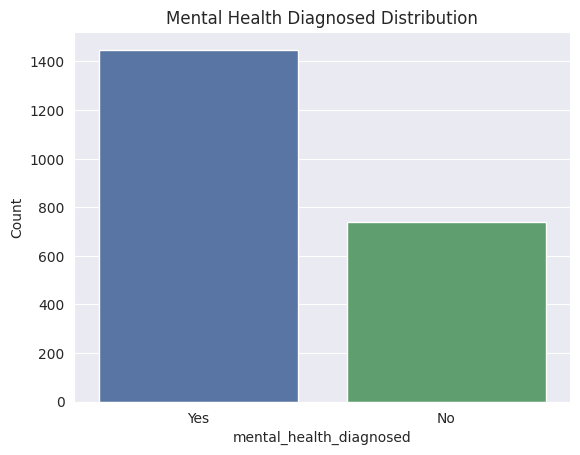

In [10]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0: 'No', 1: 'Yes'}
new_data['mh_label'] = new_data['mental_health_diagnosed'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='mh_label')
plt.xlabel('mental_health_diagnosed')
plt.ylabel('Count')
plt.title('Mental Health Diagnosed Distribution')
plt.show()

* Addressing data imbalance is important because it can affect the performance of machine learning models.

* Depending on the specific use case, we may need to consider techniques such as oversampling the minority class, undersampling the majority class, or using data augmentation methods to balance the dataset and improve model performance.

### **SMOTE**

* **SMOTE** is a popular algorithm used to address the issue of data imbalance in machine learning tasks.

* SMOTE works by creating synthetic samples in the minority class by interpolating between existing samples.

* It generates new synthetic samples by randomly selecting a minority class sample and its k nearest neighbors, and then creating new samples along the line segments joining these neighbors.


**Split the data into training and testing sets**

In [ ]:
X = data.drop(["mental_health_diagnosed"], axis=1)
y = data['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Apply SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

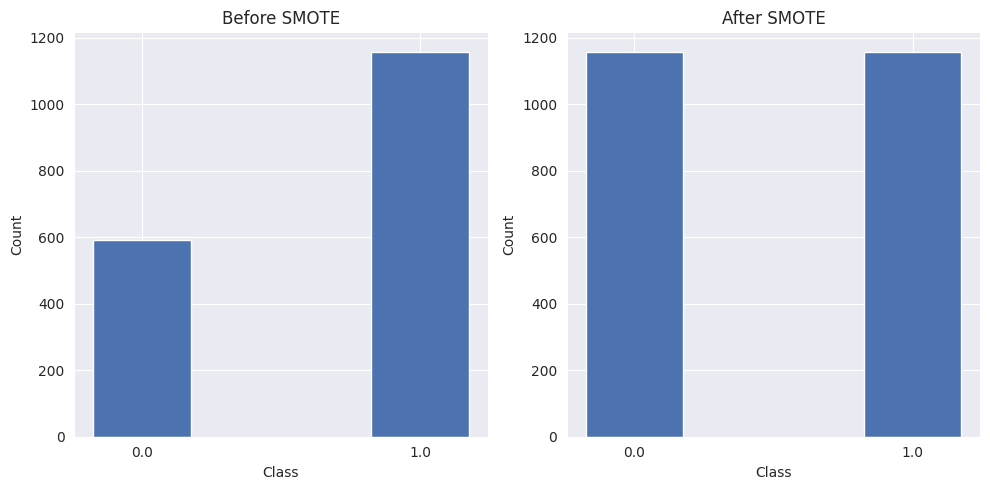

In [ ]:
# Get class labels and their counts before and after Tomek Links
unique_classes = np.unique(y_train)
class_counts_before = np.bincount(y_train)
class_counts_after = np.bincount( y_train_resampled)

# Plotting
plt.figure(figsize=(10, 5))
x = np.arange(len(unique_classes))
width = 0.35

# Before
plt.subplot(1, 2, 1)
plt.bar(x, class_counts_before, width)
plt.xticks(x, unique_classes)
plt.title('Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# After
plt.subplot(1, 2, 2)
plt.bar(x, class_counts_after, width)
plt.xticks(x, unique_classes)
plt.title('After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
y_train_resampled.value_counts()

0.0    1159
1.0    1159
Name: mental_health_diagnosed, dtype: int64

**Train a model**

In [ ]:
model = XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Make predictions and evaluate the model**

Accuracy Score: 0.9018264840182648
Specificity: 0.8040540540540541
F1 Score: 0.9277310924369748
Sensitivity: 0.9517241379310345
Geometric mean: 0.8747786299656319
Cohen's kappa coefficient: 0.7750089595030463


Confusion Matrix:
[[119  29]
 [ 14 276]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85       148
         1.0       0.90      0.95      0.93       290

    accuracy                           0.90       438
   macro avg       0.90      0.88      0.89       438
weighted avg       0.90      0.90      0.90       438





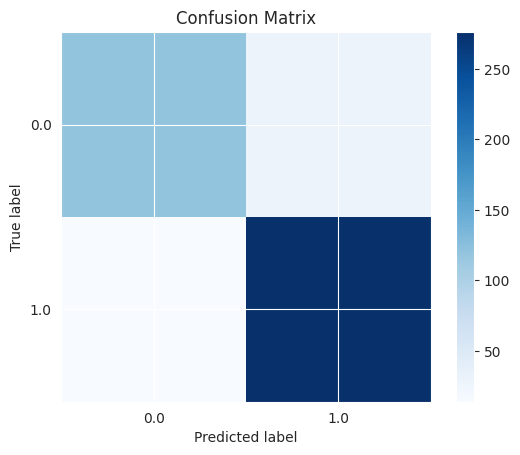

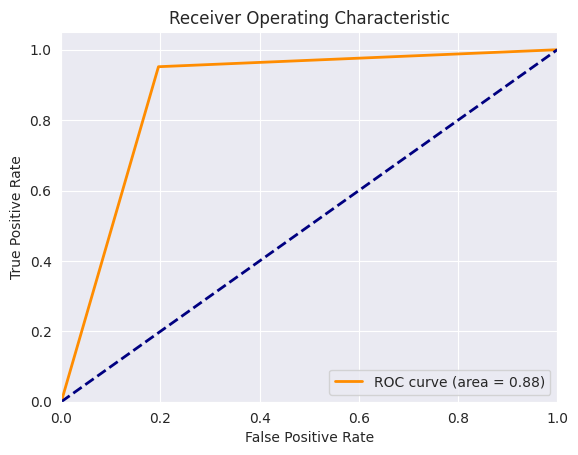

In [ ]:
# Make predictions on the test set using the new model
y_pred = model.predict(X_test)

specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])
f1 = f1_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Sensitivity: {sensitivity}")
print(f"Geometric mean: {geometric_mean_score(y_test,y_pred)}")
print(f"Cohen's kappa coefficient: {cohen_kappa_score(y_test,y_pred)}")
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
       xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix')
plt.show()

print("\n")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()